# (Ford gobike Data Analysis)
## by (Dina Gamal Mohamed)

## Investigation Overview

> In this investigation,I want to study the Ford GoBike System which is a bike sharing system in San Francisco Bay area and to know the effect of this system on the members and how much time they spend in the week riding bike and if we need to increase the number of bikes in some days of the week

## Dataset Overview

> Our Data consists of 174952 row in the bike-sharing system covering the greater San Francisco Bay area with 16 features (duration_sec-start_time-end_time- start_station_id-start_station_name-start_station_latitude-start_station_longitude-end_station_id-end_station_name -end_station_latitude-end_station_longitude-bike_id-user_type-member_birth_year-member_gender- bike_share_for_all_trip )

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('data.csv')

In [4]:
# convert the start and the ending time to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [5]:
#convert the age to intervels
def Age_intervals(row):
    if 1878 <= row <= 1956:
        return "Seniors"
    elif 1956 <= row <= 1970:
        return "Adult"
    elif 1971 <= row <= 1990:
        return "Mid-age"
    elif row > 1991:
        return "youth"

In [6]:
df['member_birth_year']=df['member_birth_year'].apply(Age_intervals)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Distribution of Trip Durations)

> Duration sec in the dataset take on a very large range of values, from about 61 sec at the lowest, to about 85444 sec at the highest. Plotted on a logarithmic scale

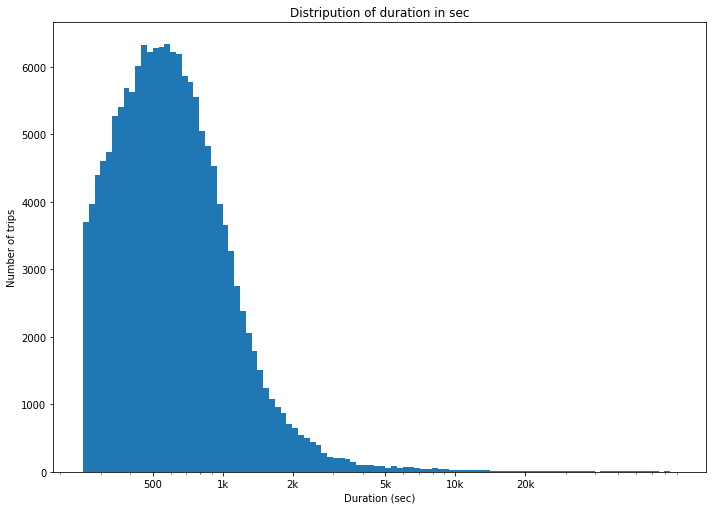

In [7]:
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max())+log_binsize, log_binsize)
plt.figure(figsize=[ 11.69, 8.27])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Duration (sec)')
plt.ylabel('Number of trips')
plt.title("Distripution of duration in sec")
plt.show()

## (Distribution of Male and the Female)

> As we can see the males is 3 time of the females members 

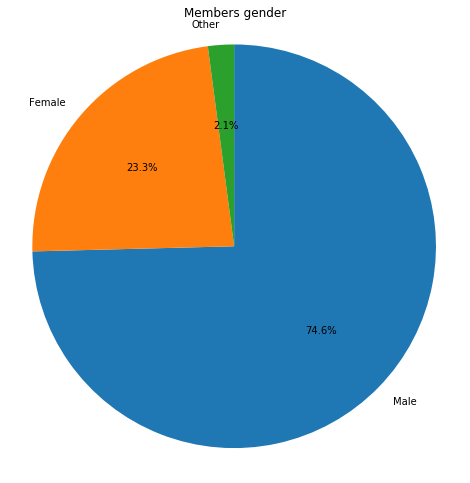

In [8]:
plt.figure(figsize=[ 11.69, 8.27])
gender_count=df['member_gender'].value_counts() 
plt.pie(gender_count,labels=gender_count.index,autopct='%1.1f%%',startangle=90,counterclock=False);
plt.title("Members gender")
plt.axis('square')
plt.show()

In [9]:
base_color=sb.color_palette()[0]

## (Distribution of Members Types)

The Member type consists of only types customer which takes a very small precentage in our data about 9.4% and subcriber which occupies the hole data with 91% 

Text(0,0.5,'number of user type')

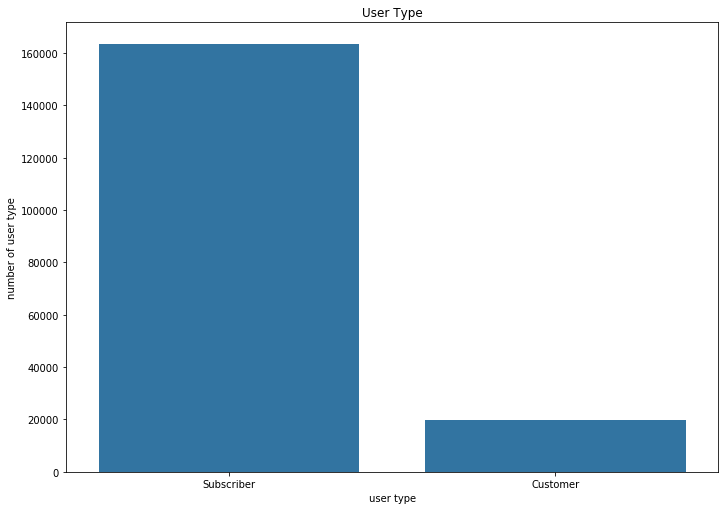

In [10]:
plt.figure(figsize=[ 11.69, 8.27])
order=df['user_type'].value_counts().index
sb.countplot(data=df,x='user_type',color=base_color,order=order);
plt.title("User Type")
plt.xlabel("user type")
plt.ylabel("number of user type")

# Distribution of Members Ages
We classifiy our member birthday into 4 categories seniors which ages is larger than 80 years and Adult thier ages between 79 and 51 years old and the third one is Mid-age which occupies the most of the data thier ages between 50-31 and the last one is the youth whose ages is less than 31


Text(0,0.5,'number of members ')

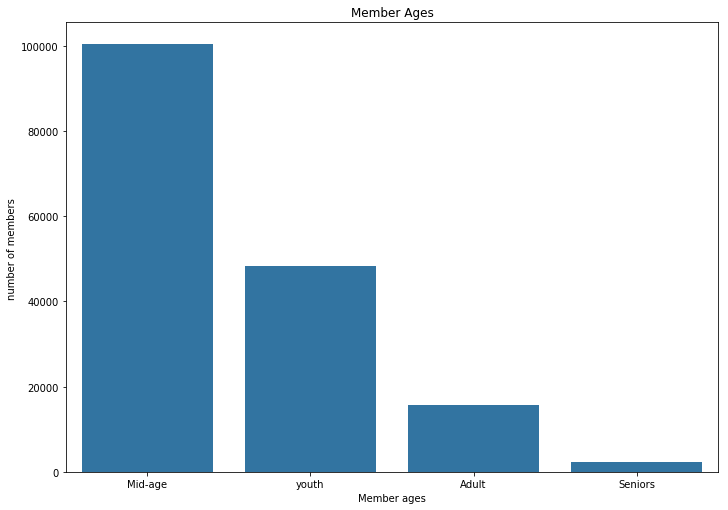

In [11]:
plt.figure(figsize=[ 11.69, 8.27])
order=df['member_birth_year'].value_counts().index
sb.countplot(data=df,x='member_birth_year',color=base_color,order=order);
plt.title("Member Ages")
plt.xlabel("Member ages")
plt.ylabel("number of members ")

# The frequancy of using bike in the weekdays
In this section we want to study the most busy day in the week and we find that it is thursday which seem logic as it is the weekend

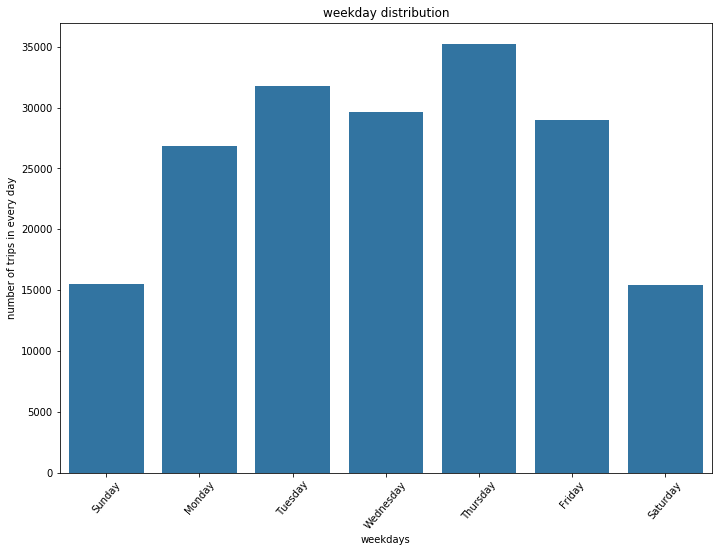

In [12]:
plt.figure(figsize=[ 11.69, 8.27])
weekday = ['Sunday','Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sb.countplot(data=df,x=df['start_time'].dt.day_name(),color=base_color,order=weekday);
plt.title("weekday distribution")
plt.xlabel("weekdays")
plt.ylabel("number of trips in every day")
plt.xticks(rotation=50);

# Gender vs Duration time
Here, we want to overview the relation between the members gender and the trip duration in sec

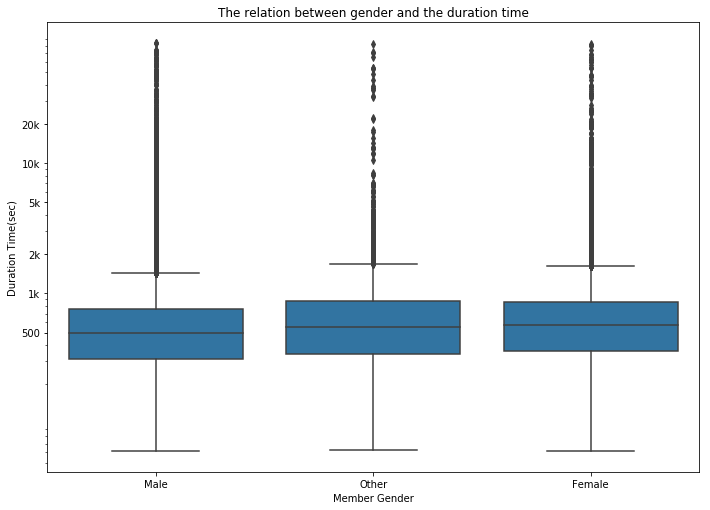

In [13]:
plt.figure(figsize=[ 11.69, 8.27])
sb.boxplot(data=df,x='member_gender',y='duration_sec',color=base_color);
plt.xlabel("Member Gender")
plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel("Duration Time(sec)")
plt.title("The relation between gender and the duration time")
plt.show()

# Member Ages vs Member type
Here, we want to study the relation between ages and the type of users we will find that the senior members do not like the customer type most of them use the subscribe type

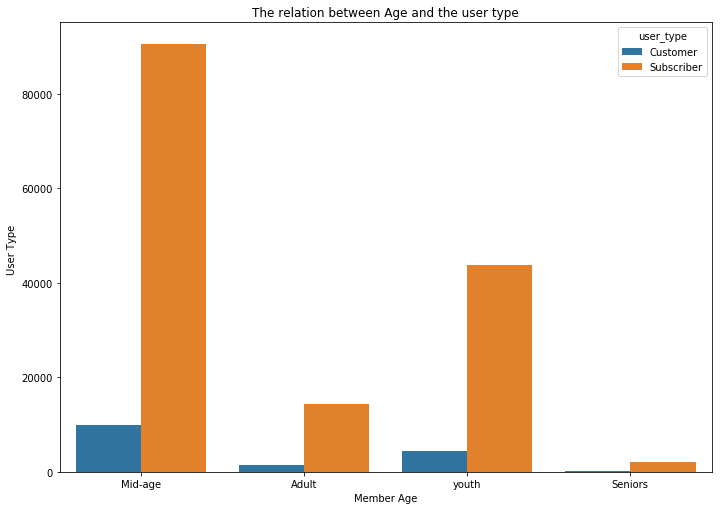

In [14]:
plt.figure(figsize=[ 11.69, 8.27])
ax=sb.countplot(data=df,x='member_birth_year',hue='user_type');
plt.xlabel("Member Age")
plt.ylabel("User Type ")
plt.title("The relation between Age and the user type")
plt.show()

# Weekdays vs Member Types
Here, we want to study in which day the customer type increase and, we will also find that its thursday 

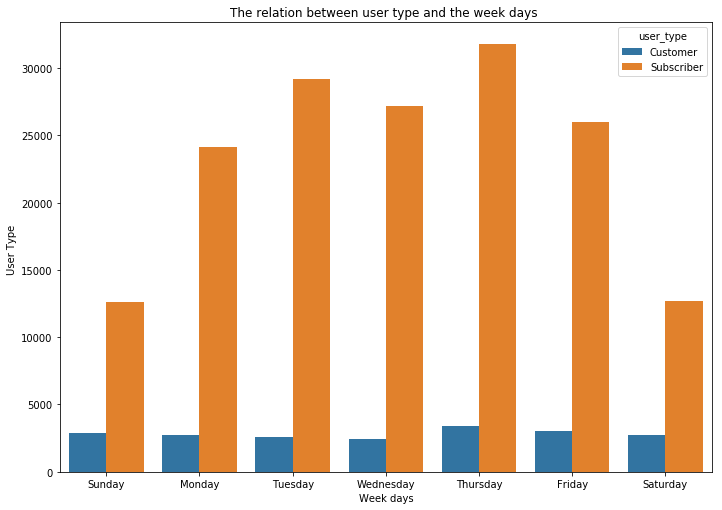

In [15]:
plt.figure(figsize=[ 11.69, 8.27])
weekday = ['Sunday','Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
ax=sb.countplot(data=df,x=df['start_time'].dt.day_name(),hue='user_type',order=weekday);
plt.xlabel("Week days")
plt.ylabel("User Type ")
plt.title("The relation between user type and the week days ")
plt.show()

# Member Ages vs Member gender vs duration time
In this section we want to study what age and gender spend more time in our bike system

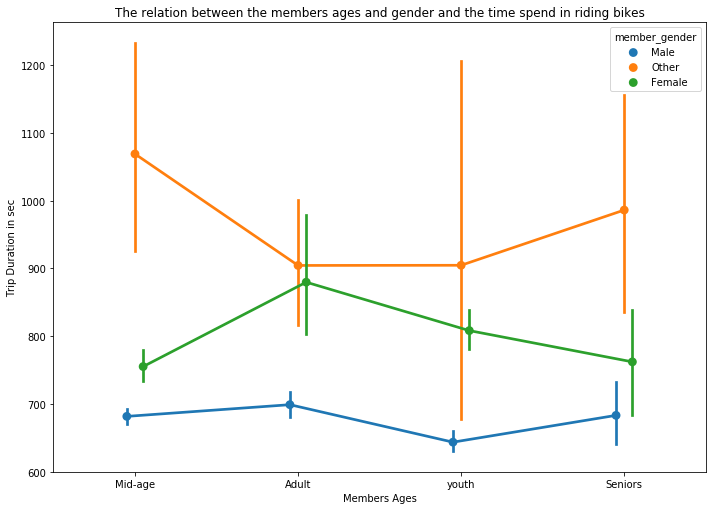

In [16]:
plt.figure(figsize=[ 11.69, 8.27])
sb.pointplot(data=df, x='member_birth_year', y=df['duration_sec'], hue='member_gender',dodge = 0.1);
plt.title('The relation between the members ages and gender and the time spend in riding bikes')
plt.xlabel('Members Ages');
plt.ylabel('Trip Duration in sec');

# Weekdays vs duration time vs Member Types
In this plot, we want to know in which day and which type spend more duration time

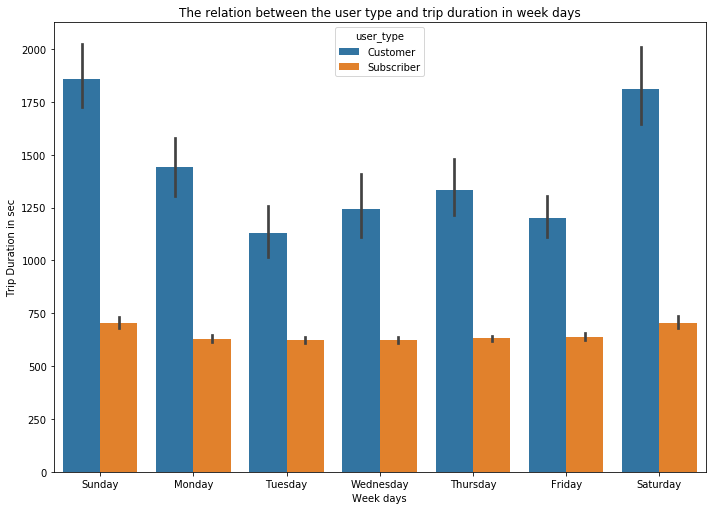

In [17]:
plt.figure(figsize=[ 11.69, 8.27])
weekday = ['Sunday','Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sb.barplot(data=df, x=df['start_time'].dt.day_name(), y=df['duration_sec'], hue='user_type',order=weekday);
plt.title("The relation between the user type and trip duration in week days")
plt.xlabel('Week days');
plt.ylabel('Trip Duration in sec');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!